In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys, time
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

from utils import read_yuv2gray, read_yuv2rgb, get_tensor_entries
from models import ALS_NN, LM_completion

In [3]:
import wandb

In [4]:
dataset_full = read_yuv2gray(height=144, width=176, n_frames=300, file_name='akiyo_qcif.yuv', file_dir='data/')
rank = 20
n_frames = 50
dim_y = 144
dim_z = 176
portion = 0.075
n_test_entries = 5000
n_val_entries = 5000
predict_frames = [20]
max_iter = 50
noisy = False
randominit = False
lambda_ = 1
n = (n_frames, dim_y, dim_z)
n_entries = int(n_frames*dim_y*dim_z*portion)
dataset = dataset_full[:n_frames]
seed = 2021

In [5]:
entries_arr = get_tensor_entries(dataset, size=n_entries, seed=seed)
val_entries = get_tensor_entries(dataset, size=n_val_entries)
test_entries = get_tensor_entries(dataset, size=n_test_entries)

solver = ALS_NN(
    n=n,
    rank=rank,
    n_entries=n_entries,
    noisy=noisy,
    randominit=randominit,
    seed=seed,
    entries_arr=entries_arr
)

In [6]:
solution = solver.fit(
    max_iter=max_iter,
    test_entries=test_entries,
    lam=lambda_
)

In [7]:
pred = solver.predict(solution, predict_frames)

In [8]:
entries_arr_old = entries_arr.copy()

In [25]:
entries_arr = get_tensor_entries(dataset, size=n_entries, seed=seed)
val_entries = get_tensor_entries(dataset, size=n_val_entries)
test_entries = get_tensor_entries(dataset, size=n_test_entries)

solver = LM_completion(
    n=n,
    rank=rank,
    n_entries=n_entries,
    noisy=noisy,
    randominit=randominit,
    seed=seed,
    entries_arr=entries_arr
)

In [ ]:
solution = solver.fit(
    max_iter=max_iter,
    test_entries=test_entries,
    lam=lambda_
)

In [ ]:
pred_lm = solver.predict(solution, predict_frames)

In [9]:
pred_clipped = pred.clip(0., 256.)

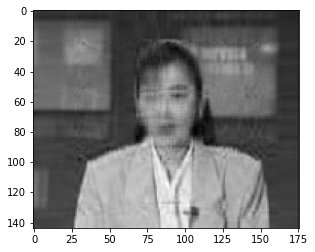

In [15]:
plt.imshow(pred_clipped[0], cmap='gray')

In [ ]:
pred_lm[0].clip(0, 256)
plt.imshow(pred_lm[0].clip(0, 256), cmap='gray')

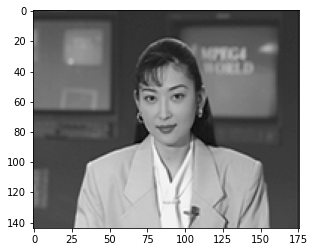

In [11]:
plt.imshow(dataset[0], cmap='gray')